In [46]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd

In [47]:
df= pd.read_csv(r"BigMart_Sales.csv")

In [ ]:
df.head()

In [ ]:
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)
df.drop('Item_Weight',axis=1,inplace=True)
df.drop('Outlet_Identifier',axis=1,inplace=True)
df.drop('Item_Identifier',axis=1,inplace=True)

In [ ]:
df.select_dtypes(include=object)

In [ ]:
df.isnull().sum()

In [48]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [49]:
df['Outlet_Size'].fillna('Undefined', inplace=True)

In [50]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

In [51]:
duplicate_rows = df[df.duplicated()]

In [52]:
duplicate_rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Undefined,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket,994.7052


In [68]:
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [59]:
df.drop('Outlet_Identifier',axis=1,inplace=True)

In [57]:
df.drop('Item_Identifier',axis=1,inplace=True)

In [54]:
df.Item_Type.value_counts().count()

16

In [55]:
fruits_and_vegetables_data = df[df['Item_Type'] == 'Fruits and Vegetables']
snack_foods_data = df[df['Item_Type'] == 'Snack Foods']
household_data = df[df['Item_Type'] == 'Household']
frozen_foods_data = df[df['Item_Type'] == 'Frozen Foods']
dairy_data = df[df['Item_Type'] == 'Dairy']
canned_data = df[df['Item_Type'] == 'Canned']
baking_goods_data = df[df['Item_Type'] == 'Baking Goods']
health_and_hygiene_data = df[df['Item_Type'] == 'Health and Hygiene']
soft_drinks_data = df[df['Item_Type'] == 'Soft Drinks']
meat_data = df[df['Item_Type'] == 'Meat']
breads_data = df[df['Item_Type'] == 'Breads']
hard_drinks_data = df[df['Item_Type'] == 'Hard Drinks']
others_data = df[df['Item_Type'] == 'Others']
starchy_foods_data = df[df['Item_Type'] == 'Starchy Foods']
breakfast_data = df[df['Item_Type'] == 'Breakfast']
seafood_data = df[df['Item_Type'] == 'Seafood']

In [60]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Column: Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Column: Outlet_Size
Outlet_Size
Medium       2793
Undefined    2410
Small        2388
High          932
Name: count, dtype: int64


Column: Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


Column: Outlet_Type
Outlet_Type
Supermarket      7440
Groce

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Loop through each column and apply label encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [70]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
0,9.30,1,0.016047,4,249.8092,1,0,1,3735.1380,1
1,5.92,2,0.019278,14,48.2692,1,2,1,443.4228,0
2,17.50,1,0.016760,10,141.6180,1,0,1,2097.2700,0
3,19.20,2,0.000000,6,182.0950,3,2,0,732.3800,0
4,8.93,1,0.000000,9,53.8614,0,2,1,994.7052,0


In [63]:
new = df[['Item_Outlet_Sales','Item_Visibility','Item_MRP']]

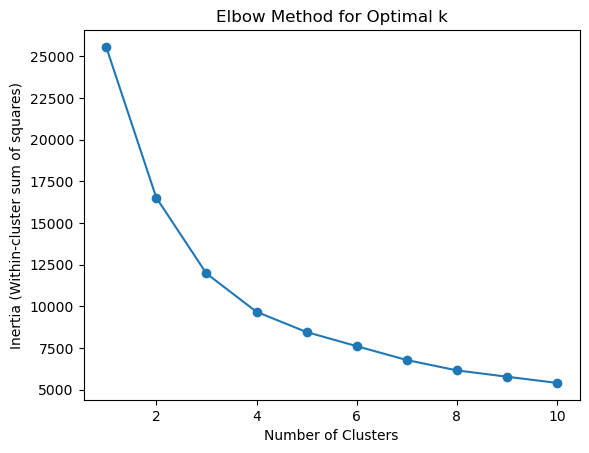

In [64]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [85]:
from sklearn.preprocessing import StandardScaler

d = df[df['Item_Type'] == 1]
scaler = StandardScaler()
a = scaler.fit_transform(d['Item_MRP'].values.reshape(-1, 1))

In [94]:
dairy_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380,1
11,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket,2187.1530,0
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket,2748.4224,1
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Undefined,Tier 3,Grocery Store,178.4344,2
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Undefined,Tier 3,Grocery Store,163.7868,2


## for in Item_type == dairy_data

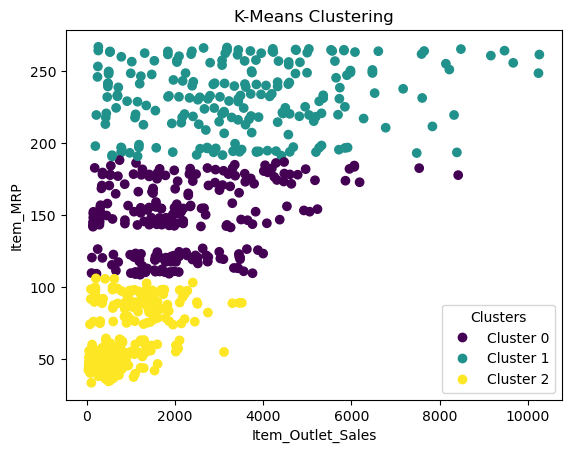

In [103]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

# Using only 'Item_MRP' for clustering
old = dairy_data[['Item_MRP']]

# Performing K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
dairy_data['cluster'] = kmeans.fit_predict(old)

# Scatter plot with color-coded clusters
scatter = plt.scatter(dairy_data['Item_Outlet_Sales'], dairy_data['Item_MRP'], c=dairy_data['cluster'], cmap='viridis')

# Creating a legend based on unique cluster values
legend_labels = [f'Cluster {cluster}' for cluster in sorted(dairy_data['cluster'].unique())]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

# Setting labels and title
plt.title('K-Means Clustering')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_MRP')

plt.show()

In [104]:
cluster_0_data = dairy_data[dairy_data['cluster'] == 0]
cluster_1_data = dairy_data[dairy_data['cluster'] == 1]
cluster_2_data = dairy_data[dairy_data['cluster'] == 2]

In [108]:
cluster_0_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
11,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket,2187.1530,0
45,FDM39,6.42,LF,0.089499,Dairy,178.1002,OUT010,1998,Undefined,Tier 3,Grocery Store,358.2004,0
67,FDZ03,13.65,Regular,0.078946,Dairy,186.0240,OUT045,2002,Undefined,Tier 2,Supermarket,1118.5440,0
183,FDU50,5.75,Regular,0.075108,Dairy,112.8176,OUT013,1987,High,Tier 3,Supermarket,1374.2112,0
227,DRF27,NaN,Low Fat,0.049755,Dairy,152.1340,OUT019,1985,Small,Tier 1,Grocery Store,153.1340,0


In [114]:
dairy_data.cluster.value_counts()

cluster
2    231
0    230
1    221
Name: count, dtype: int64

In [111]:
cluster_0_data.shape

(230, 13)

In [109]:
cluster_1_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380,1
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket,2748.4224,1
40,FDU02,13.35,Low Fat,0.102512,Dairy,230.6352,OUT046,1997,Small,Tier 1,Supermarket,3435.5280,1
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176,1
110,FDD03,13.30,Low Fat,0.079806,Dairy,232.5300,OUT046,1997,Small,Tier 1,Supermarket,699.0900,1


In [112]:
cluster_1_data.shape

(221, 13)

In [110]:
cluster_2_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Undefined,Tier 3,Grocery Store,178.4344,2
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Undefined,Tier 3,Grocery Store,163.7868,2
91,DRG27,8.895,Low Fat,0.105274,Dairy,39.9138,OUT049,1999,Medium,Tier 1,Supermarket,690.4346,2
127,FDV38,19.250,Low Fat,0.102350,Dairy,52.7956,OUT017,2007,Undefined,Tier 2,Supermarket,928.1252,2
137,FDB51,6.920,Low Fat,0.038532,Dairy,60.5852,OUT045,2002,Undefined,Tier 2,Supermarket,1314.2892,2


In [113]:
cluster_2_data.shape

(231, 13)